---

# Tutorial on Tractable Probabilistic Generative Models
---
### Demo of Probabilistic Flow Circuits 

In this notebook we will look at Probabilistic Flow Circuits - a class of tractable generative models obtained by integrating normalizing flows with probabilistic circuits. We will visualize their added expressivity and tractability by considering a synthetic 3D manifold dataset.

In [ ]:
import os 
import sys 
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt 
from trainer import Experiment
from config  import ExperimentConfig
from utils import plot3d
import torch

## Probabilistic Circuit
Let us try training an Einsum Network (probabilistic circuit) on the 3D helix dataset and visualize its learning efficiency.

EP-[   0] 	 EinsumNet 	 HELIX 	 Train LL: -12.9235 	 Valid LL: -12.9911


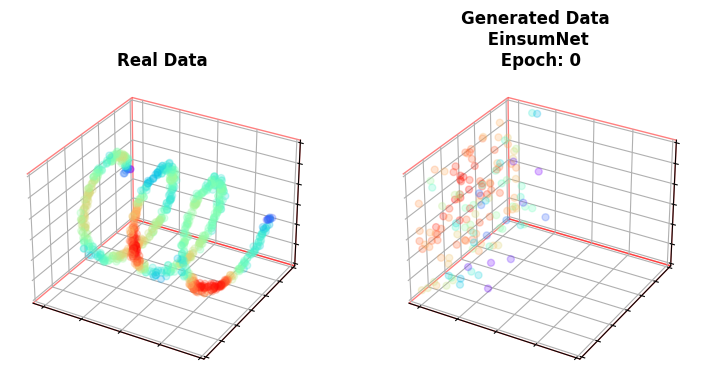

EP-[  10] 	 EinsumNet 	 HELIX 	 Train LL: -9.0407 	 Valid LL: -8.9898
EP-[  20] 	 EinsumNet 	 HELIX 	 Train LL: -7.2132 	 Valid LL: -7.2873
EP-[  30] 	 EinsumNet 	 HELIX 	 Train LL: -6.4588 	 Valid LL: -6.4402
EP-[  40] 	 EinsumNet 	 HELIX 	 Train LL: -5.8595 	 Valid LL: -5.7711
EP-[  50] 	 EinsumNet 	 HELIX 	 Train LL: -5.2587 	 Valid LL: -5.3194
EP-[  60] 	 EinsumNet 	 HELIX 	 Train LL: -4.9462 	 Valid LL: -4.9540
EP-[  70] 	 EinsumNet 	 HELIX 	 Train LL: -4.7569 	 Valid LL: -4.5643
EP-[  80] 	 EinsumNet 	 HELIX 	 Train LL: -4.2809 	 Valid LL: -4.4201
EP-[  90] 	 EinsumNet 	 HELIX 	 Train LL: -4.0785 	 Valid LL: -4.1319
EP-[ 100] 	 EinsumNet 	 HELIX 	 Train LL: -3.9901 	 Valid LL: -3.9582
EP-[ 110] 	 EinsumNet 	 HELIX 	 Train LL: -3.6684 	 Valid LL: -3.6269
EP-[ 120] 	 EinsumNet 	 HELIX 	 Train LL: -3.3441 	 Valid LL: -3.3522
EP-[ 130] 	 EinsumNet 	 HELIX 	 Train LL: -3.1340 	 Valid LL: -3.1813
EP-[ 140] 	 EinsumNet 	 HELIX 	 Train LL: -3.0317 	 Valid LL: -3.0579
EP-[ 150] 	 EinsumNe

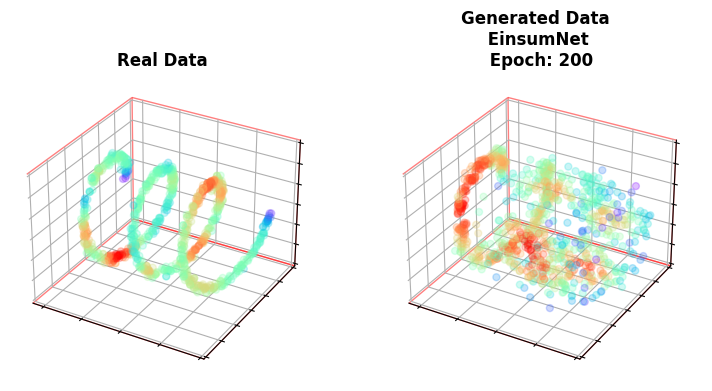

----------
EP-[ 200] 	 EinsumNet 	 HELIX 	 Test LL: -2.8748 


In [ ]:
pc_config = ExperimentConfig(
    dataset_name = "HELIX",
    model_name   = "EinsumNet",
    experiment_name   = "Tutorial",
    num_input_distributions = 10,
    num_repetition          = 10,
    num_sums                = 10,
    
)
pc_experiment = Experiment(pc_config)
pc_experiment.run_training_loop()

# Probabilistic Flow Circuits
Now let us train an Einsum Network having the same structure but with Linear Ration Spline Flow transformations at the leaf (a probabilistic flow circuit) on the 3D Helix dataset and visualize its learning efficienvy.

EP-[   0] 	 LinearSplineEinsumFlow 	 HELIX 	 Train LL: -11.8186 	 Valid LL: -11.9777


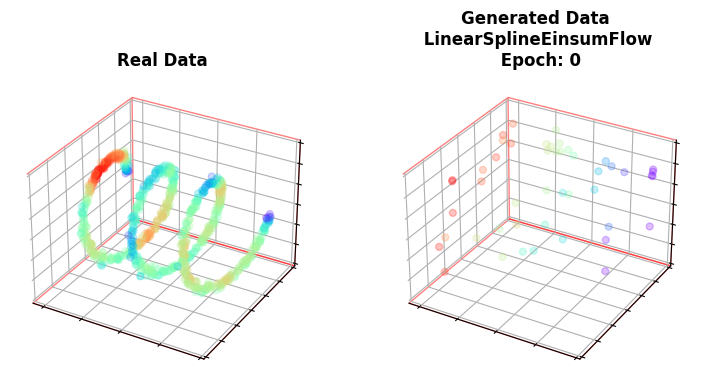

EP-[  10] 	 LinearSplineEinsumFlow 	 HELIX 	 Train LL: -3.5344 	 Valid LL: -3.5278
EP-[  20] 	 LinearSplineEinsumFlow 	 HELIX 	 Train LL: -2.5187 	 Valid LL: -2.5270
EP-[  30] 	 LinearSplineEinsumFlow 	 HELIX 	 Train LL: -2.0607 	 Valid LL: -2.0650
EP-[  40] 	 LinearSplineEinsumFlow 	 HELIX 	 Train LL: -1.8668 	 Valid LL: -1.8610
EP-[  50] 	 LinearSplineEinsumFlow 	 HELIX 	 Train LL: -1.7832 	 Valid LL: -1.8245
EP-[  60] 	 LinearSplineEinsumFlow 	 HELIX 	 Train LL: -1.6394 	 Valid LL: -1.7216
EP-[  70] 	 LinearSplineEinsumFlow 	 HELIX 	 Train LL: -1.6249 	 Valid LL: -1.6315
EP-[  80] 	 LinearSplineEinsumFlow 	 HELIX 	 Train LL: -1.6252 	 Valid LL: -1.6896
EP-[  90] 	 LinearSplineEinsumFlow 	 HELIX 	 Train LL: -1.5538 	 Valid LL: -1.5621
EP-[ 100] 	 LinearSplineEinsumFlow 	 HELIX 	 Train LL: -1.5693 	 Valid LL: -1.6239
EP-[ 110] 	 LinearSplineEinsumFlow 	 HELIX 	 Train LL: -1.5584 	 Valid LL: -1.5711
EP-[ 120] 	 LinearSplineEinsumFlow 	 HELIX 	 Train LL: -1.5164 	 Valid LL: -1.5695
EP-[

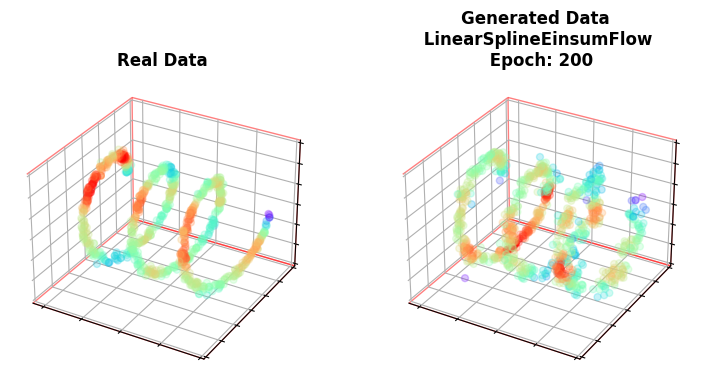

----------
EP-[ 200] 	 LinearSplineEinsumFlow 	 HELIX 	 Test LL: -1.5398 


In [ ]:
pfc_config = ExperimentConfig(
    dataset_name = "HELIX",
    model_name   = "LinearSplineEinsumFlow",
    experiment_name   = "Tutorial",
    num_input_distributions = 10,
    num_repetition          = 10,
    num_sums                = 10,
)
pfc_experiment = Experiment(pfc_config)
pfc_experiment.run_training_loop()

## Visualizing the learning curves

In [ ]:
def visualize_likelihood(exp, ax, label="", color="r"):
    ll = exp.log["valid_ll"]
    x_axis = [x for (x,y) in ll]
    y_axis = [y for (x,y) in ll]
    ax.plot(x_axis, y_axis, label=label, color=color, lw=2)


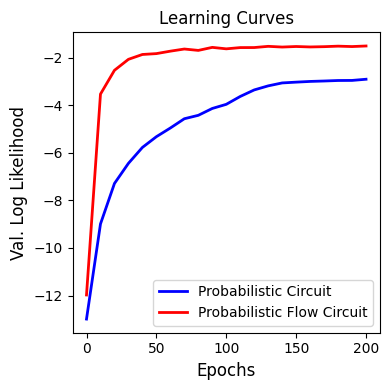

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.set_title("Learning Curves")
ax.set_ylabel("Val. Log Likelihood", fontsize=12)
ax.set_xlabel("Epochs", fontsize=12)
visualize_likelihood(pc_experiment, ax, "Probabilistic Circuit", color="b")
visualize_likelihood(pfc_experiment, ax, "Probabilistic Flow Circuit", color="r")
plt.legend()
plt.show()

# Controlled Generation
Let us utilize the tractability of the Probabilistic Flow circuit to generate datapoints with certain characteristics, by sampling from conditional distributions.

In [ ]:
def visualize_samples(samples):
  fig = plt.figure(figsize=(4,4))
  ax = fig.add_subplot(111, projection='3d')
  (xmax,xmin),(ymax,ymin),(zmax,zmin) = dataset.dim_range()
  plot3d(samples, ax, 0.25, ymin, ymax, xmin, xmax, zmin, zmax)
  plt.show()

In [ ]:
def visualize_controlled_generation(exp):
  dataset = exp.dataset
  samples = dataset.tst.x
  
  print("Query: Generate samples with the property that their xy projection equals the black curve")
  
  for dim in [1,2]:
    for manifold in [samples[samples[:,dim]>0],samples[samples[:,dim]<0]]:
      manifold[:,0] *= 0
      fig = plt.figure(figsize=(4,4))
      ax = fig.add_subplot(111, projection='3d')
      ax.scatter(manifold[:,0], manifold[:,1], manifold[:,2], color='black', s=5)
      generated = exp.model.sample_conditional(x=torch.from_numpy(manifold).to(exp.config.device), marginalization_idx=[0]).detach().cpu().numpy()
      (xmax,xmin),(ymax,ymin),(zmax,zmin) = dataset.dim_range()
      plot3d(generated, ax, 0.25, ymin, ymax, xmin, xmax, zmin, zmax)
      plt.show()

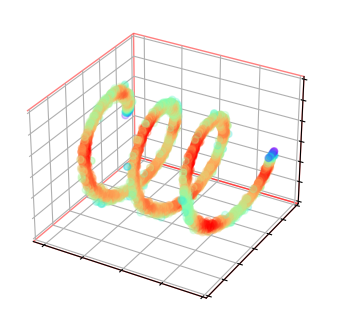

Query: Generate samples with the property that their xy projection equals the black curve


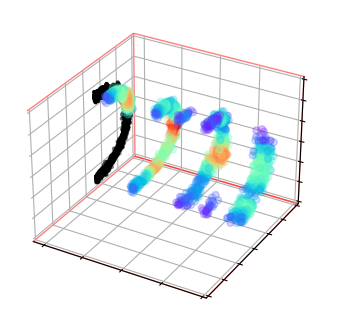

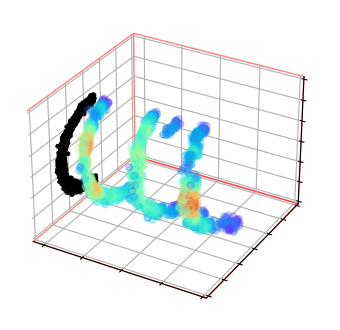

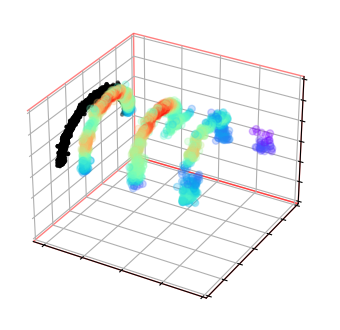

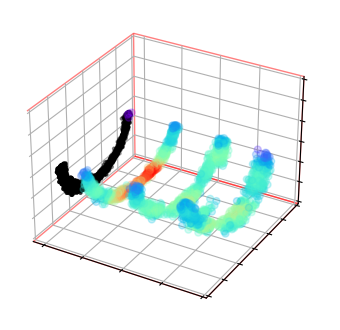

In [ ]:
visualize_samples(pfc_experiment.dataset.tst.x)
visualize_controlled_generation(pfc_experiment)